In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('../Dataset/FitbitTrainDataFixed.csv')
test = pd.read_csv('../Dataset/FitbitTestDataFixed.csv')

In [7]:
df = pd.concat([train, test])
df = df[['DistancePerStep','Total_MET','Calories']]

In [8]:
X = df[['DistancePerStep','Total_MET']]
y = df['Calories']

In [10]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error as mse

model = CatBoostRegressor(verbose=0)

model.fit(X,y)
y_pred = model.predict(X)


In [19]:
residuals = y_pred - y
residuals

0       35.414326
1     -332.717676
2     -266.242858
3     -104.491593
4       85.717450
          ...    
183    -37.042268
184   -117.792709
185   -116.221741
186     34.624165
187   -142.811860
Name: Calories, Length: 939, dtype: float64

In [28]:
print(f"Terdapat {len(np.where(residuals >= 0)[0])} selisih yang positif dari total {len(residuals)} data")

Terdapat 445 selisih yang positif dari total 939 data


In [26]:
print("Rata-rata y actual:")
np.mean(y)

Rata-rata y actual:


2306.062832800852

In [27]:
print("Rata-rata y predicted:")
np.mean(y_pred)

Rata-rata y predicted:


2306.172611057436

Text(0, 0.5, 'Residuals')

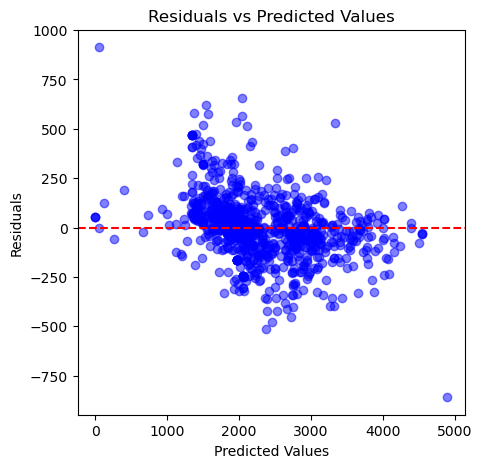

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(y, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

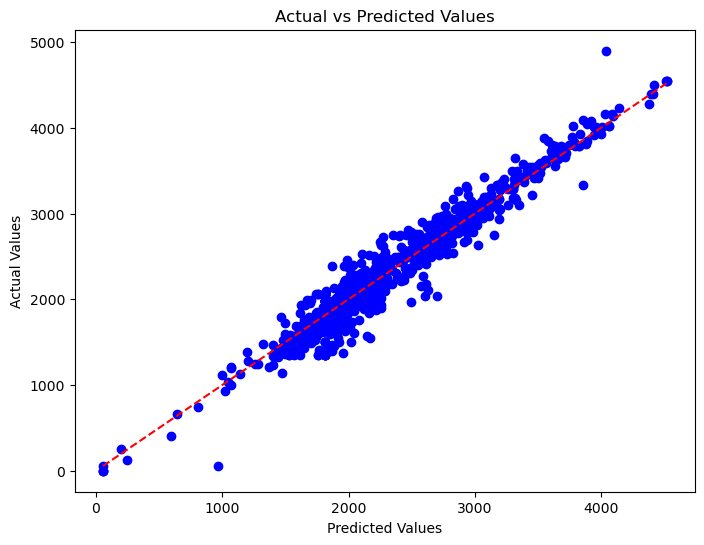

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y, color='blue')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'r--')  # Garis diagonal
plt.title('Actual vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()